<a href="https://colab.research.google.com/github/mocccca/cmor438/blob/main/Supervised%20Learning/Decision%20Tree/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree for Regression and Classification

A **Decision Tree** is a supervised learning algorithm that can be used for both regression and classification tasks.  
It splits the dataset into subsets based on feature values, forming a tree structure where each internal node represents a decision rule, each branch represents an outcome, and each leaf node represents a final prediction.



## General Process

1. **Input**
   Dataset with predictor variables (`X`) and a target variable (`y`).

2. **Recursive Splitting**
   - At each node, select the best feature and threshold to split the data.
   - For regression: minimize variance (mean squared error) within splits.
   - For classification: maximize purity (e.g., using Gini impurity or entropy).

3. **Tree Building**
   - Continue splitting nodes until stopping criteria are met (e.g., max depth, min samples per leaf).

4. **Prediction**
   - For a new input, traverse the tree based on feature values to reach a leaf.
   - Output the leaf’s value (regression) or class label (classification).



## Advantages of Decision Trees

- **Simple and Interpretable**
  Easy to visualize and understand; decisions are made through clear, rule-based splits.

- **Handles Both Numerical and Categorical Data**
  Flexible for mixed-type datasets.

- **Nonlinear Relationships**
  Can model interactions between features without requiring feature scaling.

- **No Need for Data Normalization**
  Works directly on raw feature values.



## Disadvantages of Decision Trees

- **Prone to Overfitting**
  Especially if not pruned or constrained.

- **Sensitive to Small Changes**
  Small variations in the data can result in very different tree structures.

- **Limited Predictive Power**
  Alone, they usually underperform compared to ensemble methods like Random Forest or Boosting.



## Application 1: Regression

### Variables

- **Predictors (`X`):**
  - `emotional_exhaution_composite`
  - `procrastination_composite`
  - `workaholism_composite`
  - `neuroticism_composite`
  - `general_js_composite` (general job satisfaction)
  - `global_js_composite` (global job satisfaction)

- **Target (`y`):**
  - `depression_composite`

### Goal

Use a **Decision Tree Regressor** to predict participants’ depression levels based on emotional exhaustion, procrastination, workaholism, neuroticism, and job satisfaction measures.



## Application 2: Classification

### Variables

- **Predictors (`X`):**
  - `age`
  - `ocb_composite` (organizational citizenship behavior)
  - `ip_realistic` (RIASEC realistic dimension)
  - `education_level`

- **Target (`y`):**
  - `org_status_3` (supervisory status — whether the person supervises others)

### Goal

Use a **Decision Tree Classifier** to predict whether participants hold supervisory roles in their organization based on age, education, personality, and organizational behavior variables.



regression tree

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# import data
url = "https://raw.githubusercontent.com/mocccca/cmor438/main/Leisure_Intereset_Dataset.csv"
li = pd.read_csv(url)
li3 = li[['depression_composite', 'emotional_exhaution_composite', 'procrastination_composite']].copy()
li3

X = li3[['emotional_exhaution_composite', 'procrastination_composite']].values
y = li3['depression_composite'].values

In [40]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg_tree = DecisionTreeRegressor(
    max_depth=3,       # Control complexity
    min_samples_leaf=5 # Prevent overfitting
)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

R² Score: 0.21


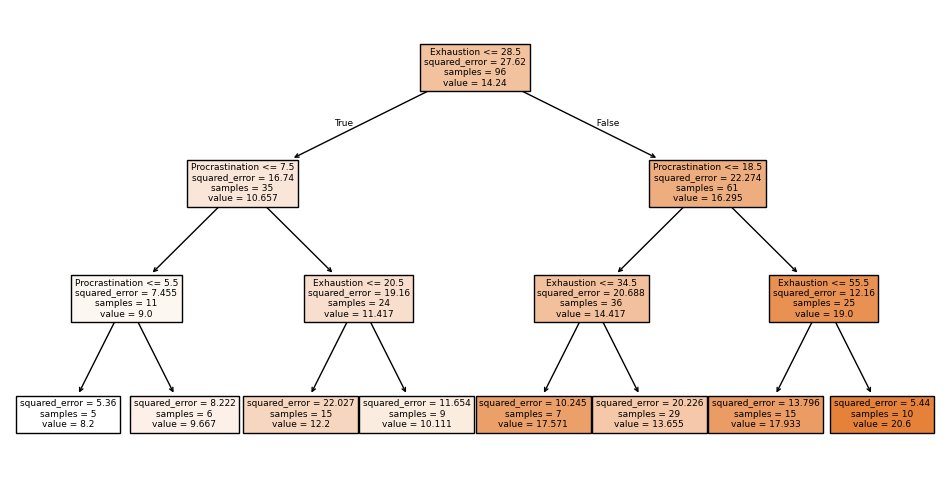

In [41]:
# Evaluate
print(f"R² Score: {reg_tree.score(X_test, y_test):.2f}")

# Visualize tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(reg_tree,
          feature_names=['Exhaustion', 'Procrastination'],
          filled=True)
plt.show()

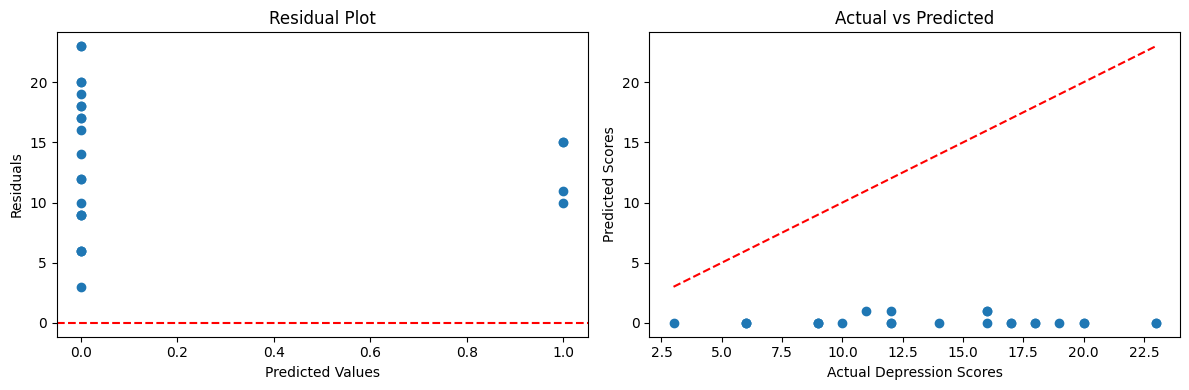

In [42]:
plt.figure(figsize=(12, 4))

# Residual plot
plt.subplot(121)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Actual vs Predicted
plt.subplot(122)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Depression Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted')

plt.tight_layout()
plt.show()

what about with more variables?

In [43]:
li5 = li[['depression_composite', 'emotional_exhaution_composite', 'procrastination_composite', 'workaholism_composite', 'neuroticism_composite', 'general_js_composite', 'global_js_composite']].copy()
X = li5[['emotional_exhaution_composite', 'procrastination_composite', 'workaholism_composite', 'neuroticism_composite', 'general_js_composite', 'global_js_composite']].values
y = li5['depression_composite'].values

In [59]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg_tree = DecisionTreeRegressor(
    max_depth=3,       # Control complexity
    min_samples_leaf=8 # Prevent overfitting
)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=8)

R² Score: 0.39


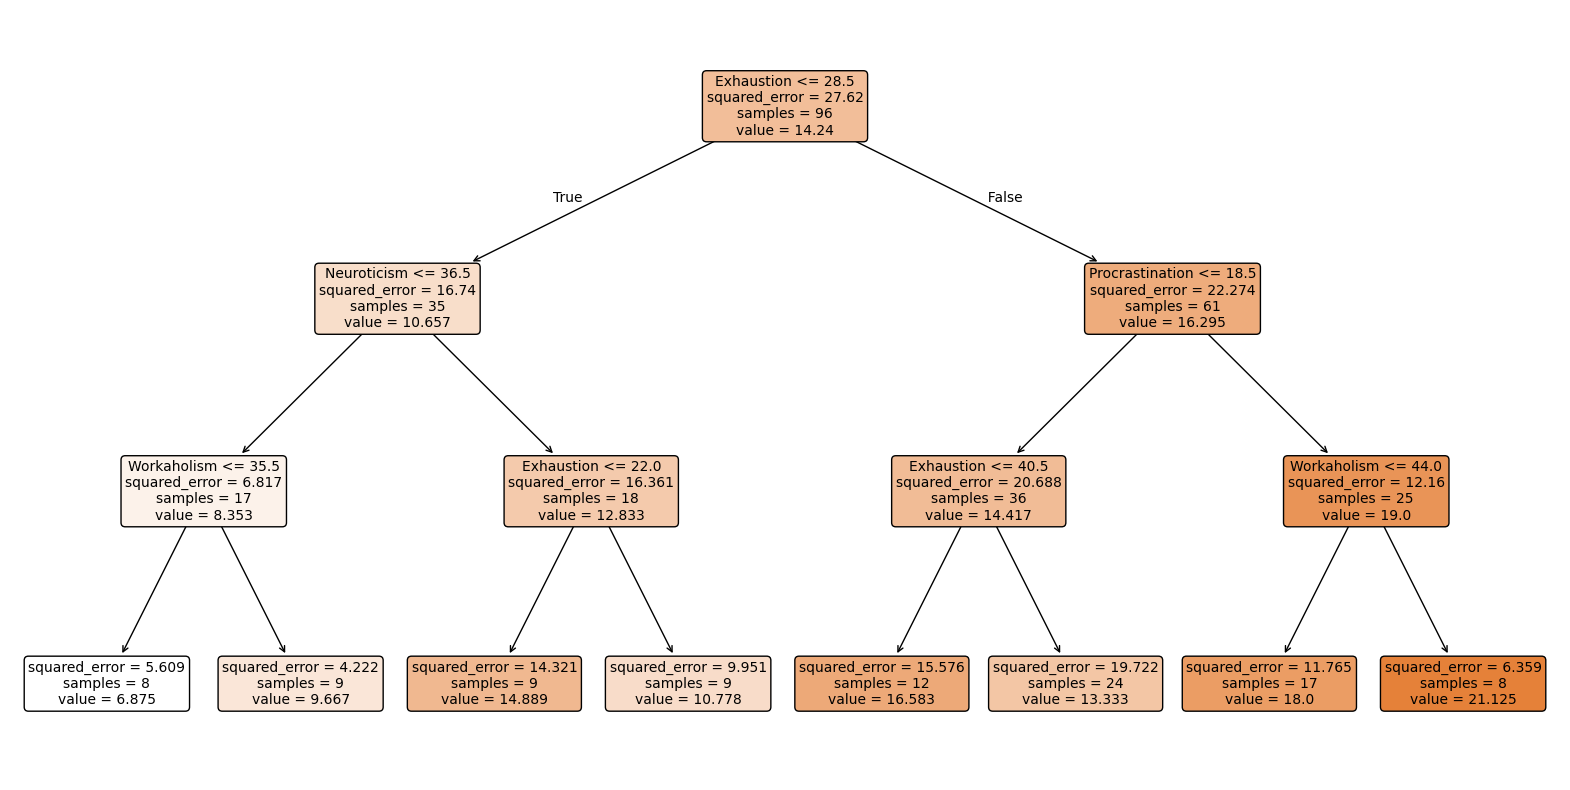

In [60]:
# Evaluate
print(f"R² Score: {reg_tree.score(X_test, y_test):.2f}")

# Visualize tree
from sklearn.tree import plot_tree
feature_names = [
    'Exhaustion',
    'Procrastination',
    'Workaholism',
    'Neuroticism',
    'General_JS',
    'Global_JS'
]

plt.figure(figsize=(20, 10))
plot_tree(reg_tree,
          feature_names=feature_names,  # Now matches 6 features
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

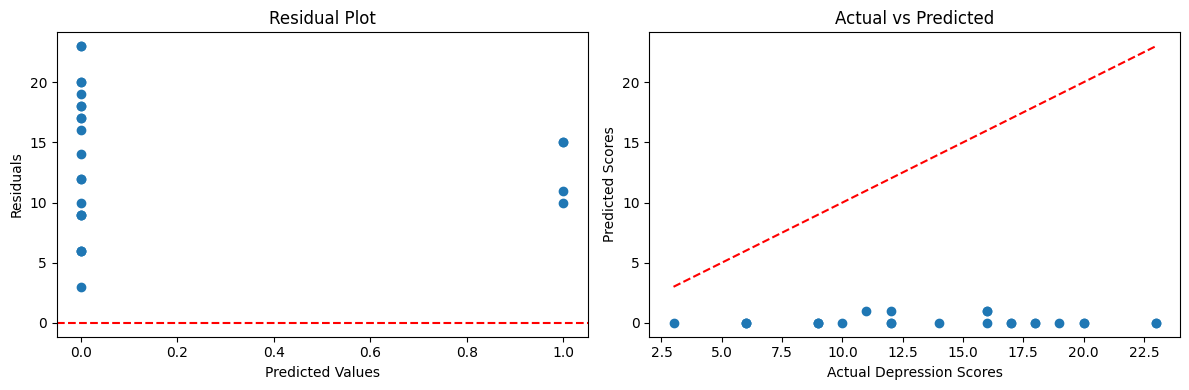

In [56]:
plt.figure(figsize=(12, 4))

# Residual plot
plt.subplot(121)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Actual vs Predicted
plt.subplot(122)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Depression Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted')

plt.tight_layout()
plt.show()

classification tree

In [29]:
# prepare data
li4 = li[['org_status_3', 'age', 'ocb_composite','education_level']].copy()

li4['ip_realistic'] = li['ipa_realistic'].combine_first(li['ipb_realistic'])

# Define ordered categories
education_levels = [
    "Less than high school",
    "High school degree",
    "Some college",
    "Associate degree",
    "Bachelor’s degree",
    "Master’s degree",
    "Professional degree",
    "Doctorate"
]

# Convert to ordered categorical (preserving original 1-8 codes)
li4['education_level'] = pd.Categorical(
    li4['education_level'],
    categories=[1, 2, 3, 4, 5, 6, 7, 8],  # Your original codes
    ordered=True
)

# Define variables
X = li4[['age', 'ocb_composite', 'ip_realistic','education_level']]
y = li4['org_status_3'].values  # supervise people

In [30]:
# Preprocess: Encode education if not already ordinal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf_tree = DecisionTreeClassifier(
    max_depth=2,        # Simpler interpretable tree
    class_weight='balanced'  # Handle imbalanced classes
)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2)

In [36]:
# Evaluate
print(classification_report(y_test, clf_tree.predict(X_test)))

# Feature Importance
importances = clf_tree.feature_importances_
print("Feature Importances:")
for name, score in zip(['Age', 'OCB', 'IP Realistic', 'Education'], importances):
    print(f"{name}: {score:.2f}")

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       1.00      0.36      0.53        11

    accuracy                           0.72        25
   macro avg       0.83      0.68      0.67        25
weighted avg       0.81      0.72      0.68        25

Feature Importances:
Age: 0.00
OCB: 0.33
IP Realistic: 0.51
Education: 0.16


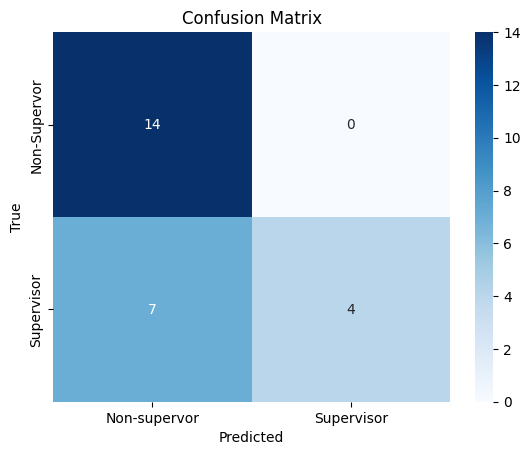

In [37]:
# visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-supervor', 'Supervisor'],
            yticklabels=['Non-Supervor', 'Supervisor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The tree is very good at identifying non-supervisors (perfect recall), but struggles to catch supervisors (only 36% recall), suggesting it being overconfident on non-supervisors when it does predict it (precision 1.00), but misses many true non-supervisors cases. The tree mainly relies on Realistic dimension and OCB, ignoring Age.